# Q2.2 Dual PCA of Yale Face Database
## Importing Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = [10,5]

## Importing Yale Face Dababase

In [36]:
data = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

## In Dual PCA if A has dimensions n by t then n >> t

## Taking only t-number of samples for Analysis

In [37]:
t = 100
X = np.array(data['fea'])[:t,:].T

In [38]:
print(X.shape)

(4096, 100)


## Visualizing one of the sample image

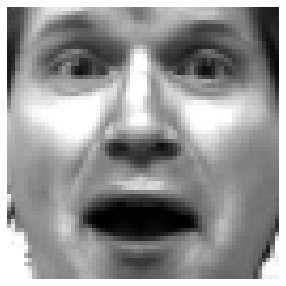

In [39]:
img = plt.imshow(X[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()

## Calculating At*A

In [40]:
XtX = np.matmul(X.T,X)

In [41]:
print(XtX.shape)

(100, 100)


## Calculating Eigen values of At*A

In [42]:
eigValues, eigVectors = np.linalg.eigh(XtX)

In [43]:
print(eigValues.shape)

(100,)


In [44]:
print(eigValues)

[-1.44213332e+03 -1.32446410e+03 -1.30623412e+03 -1.24429096e+03
 -1.21678564e+03 -1.19797082e+03 -1.11729236e+03 -1.06525344e+03
 -1.05588651e+03 -1.04058313e+03 -9.76025720e+02 -9.18680023e+02
 -8.97465034e+02 -8.84722094e+02 -8.75651691e+02 -8.37038678e+02
 -8.14724711e+02 -7.79495263e+02 -7.38948305e+02 -7.15844200e+02
 -6.91368810e+02 -6.71493309e+02 -6.58297084e+02 -6.00216821e+02
 -5.79281157e+02 -5.36942209e+02 -5.10119884e+02 -5.03721547e+02
 -4.50460504e+02 -4.40144652e+02 -4.31936255e+02 -4.05144336e+02
 -3.76509059e+02 -3.47656317e+02 -3.10738072e+02 -2.98757430e+02
 -2.82611833e+02 -2.22261329e+02 -2.11557931e+02 -1.90942705e+02
 -1.68230865e+02 -1.63777417e+02 -1.15412219e+02 -8.18540193e+01
 -6.54047420e+01 -4.83431968e+01 -3.63863311e+01 -2.96248105e+01
  4.63655445e-14  1.78288084e-13  1.11059645e+01  4.91114620e+01
  6.64342907e+01  9.25994971e+01  1.01413404e+02  1.48782785e+02
  1.87128456e+02  2.21946170e+02  2.34283584e+02  2.62349975e+02
  2.80922163e+02  2.92709

## Sorting eigen values in descending values and changing order of 
## eigen vectors correspondingly

In [45]:
idx = eigValues.argsort()[::-1]   
eigValues = eigValues[idx]
eigVectors = eigVectors[:,idx]

In [46]:
print(eigValues)

[ 1.28139567e+04  1.49057913e+03  1.40632623e+03  1.39149840e+03
  1.30376543e+03  1.27040551e+03  1.21809367e+03  1.13845770e+03
  1.10354195e+03  1.07439711e+03  1.01280301e+03  9.86367520e+02
  9.70877545e+02  9.23296090e+02  9.04948515e+02  8.59706496e+02
  8.40891654e+02  7.99554795e+02  7.85210254e+02  7.34998271e+02
  7.19088198e+02  6.87894811e+02  6.80666083e+02  6.62120820e+02
  6.23520739e+02  6.19289307e+02  5.90376424e+02  5.62420730e+02
  5.40440401e+02  5.11577217e+02  5.07492373e+02  4.72931541e+02
  4.38690758e+02  4.23277169e+02  4.04102718e+02  3.58319602e+02
  3.39613235e+02  2.99399922e+02  2.92709212e+02  2.80922163e+02
  2.62349975e+02  2.34283584e+02  2.21946170e+02  1.87128456e+02
  1.48782785e+02  1.01413404e+02  9.25994971e+01  6.64342907e+01
  4.91114620e+01  1.11059645e+01  1.78288084e-13  4.63655445e-14
 -2.96248105e+01 -3.63863311e+01 -4.83431968e+01 -6.54047420e+01
 -8.18540193e+01 -1.15412219e+02 -1.63777417e+02 -1.68230865e+02
 -1.90942705e+02 -2.11557

In [47]:
eigVals = eigValues.copy()

## Finding out number of least significant eigen Values

In [48]:
r = 0
index_of_small_eig_values = []
while(r<len(eigValues)):
        if eigValues[r]<1:
            index_of_small_eig_values.append(eigValues[r])
        r += 1

## Here that number turns out to be 50

In [49]:
small_eig_vals = len(index_of_small_eig_values)
print(small_eig_vals)

50


In [50]:
eigVals = np.array(eigVals)

## Creating Singular value matrix

In [51]:
D = eigVals[:-small_eig_vals]**(1/2)

## Visualizing Singular values matrix pattern

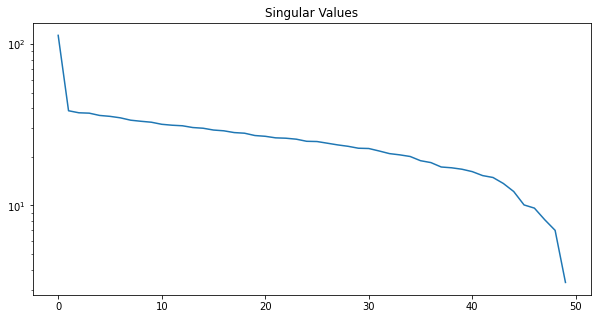

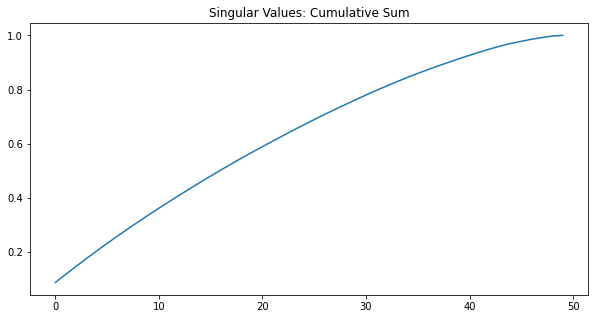

In [52]:
plt.figure(1)
plt.semilogy(D)
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(D)/np.sum(D))
plt.title('Singular Values: Cumulative Sum')
plt.show()

## Formint V.transpose() Matrix

In [53]:
Vt = eigVectors.copy().T

## Reconstruction of Training data
## xcap = X**V**Vt

In [54]:
Xcap = (X.dot(Vt.T)).dot(Vt)

In [55]:
print(Xcap.shape)

(4096, 100)


## Visualizing Reconstructed Data

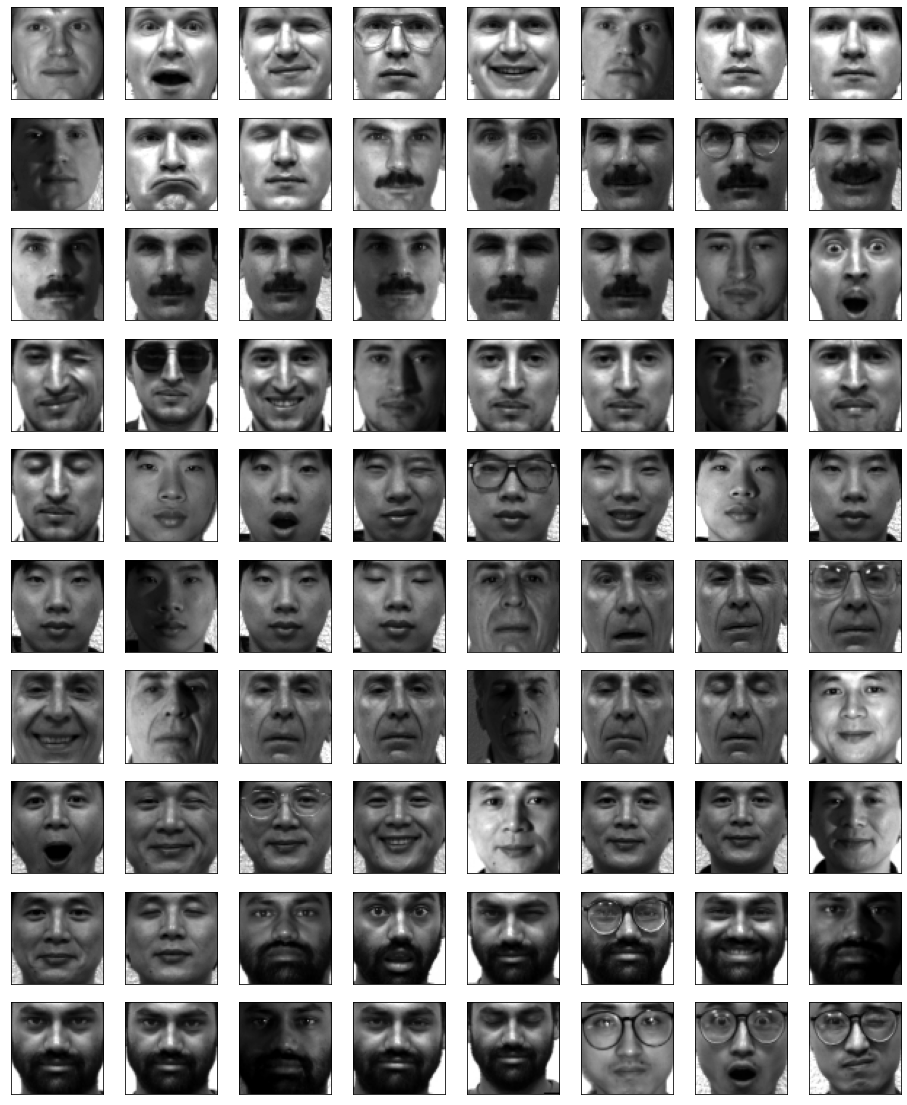

In [56]:
plt.figure(figsize=(16,20))
for i in range(1,81):
    plt.subplot(10,8,i,xticks=[],yticks=[])
    img = plt.imshow(Xcap[:,i-1].reshape(64,64).T.astype('uint8'),cmap='gray')
    plt.plot()

## Reconstruction of Test Data
### ycap = X**V**(Σ^−2)**Vt**Xtx

In [57]:
D_temp = np.zeros((len(D),len(D)))
for i in range(len(D)):
    D_temp[i][i] = D[i]

D = D_temp

In [58]:
for i in range(len(D)):
    print(D[i][i])

113.19874858014401
38.608019036836296
37.50101635278476
37.302793485663805
36.10769217838276
35.64274829061269
34.90119875071728
33.741038839022025
33.21960183939981
32.777997404141246
31.824566061490245
31.40648850212336
31.158907953977785
30.385787625614764
30.0823621968586
29.320751967869843
28.998131908246993
28.276399959960777
28.021603345223525
27.11085153717597
26.81581991334121
26.227748880385747
26.089578056453934
25.731708462098233
24.970397256256746
24.885524047988394
24.297662938058185
23.715411233093413
23.24737407555087
22.618072787836233
22.527591375113797
21.746989243648752
20.944945890945384
20.573700896829767
20.102306292414788
18.929331786546687
18.428598304297516
17.303176645659565
17.108746638795072
16.76073275974999
16.19722121171101
15.306324969058053
14.897857891115656
13.679490338037773
12.197654899409132
10.07042222643836
9.622863246118387
8.150723322988473
7.007957045914438
3.3325612515534706


In [59]:
invD_sq = np.linalg.inv(np.matmul(D,D))

In [60]:
print(invD_sq)

[[7.80399080e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.70880182e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.11072567e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.50524675e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.03618455e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.00417069e-02]]


In [61]:
print(X.shape)
print(Vt.T.shape)
print(invD_sq.shape)
print(Vt.shape)
print(X.T.shape)
print(X.shape)

(4096, 100)
(100, 100)
(50, 50)
(100, 100)
(100, 4096)
(4096, 100)


In [62]:
X_approx = X[:,:t-small_eig_vals]
Vt_approx = Vt[:t-small_eig_vals,:t-small_eig_vals]

In [63]:
print(X_approx.shape)
print(Vt_approx.T.shape)
print(invD_sq.shape)
print(Vt_approx.shape)
print(X_approx.T.shape)
print(X_approx.shape)

(4096, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 4096)
(4096, 50)


In [64]:
UUt = np.matmul(X_approx[:,:],np.matmul(Vt_approx.T,np.matmul(invD_sq,np.matmul(Vt_approx,X_approx.T))))

In [65]:
y = np.matmul(UUt,X[:,0])

In [66]:
print(y.shape)

(4096,)


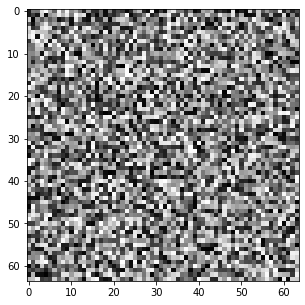

In [67]:
img = plt.imshow(y.reshape(64,64).astype('uint8').T)
img.set_cmap('gray')

## In Dual PCA, in most cases reconstruction of test data 
## i.e. out of sample reconstruction is not possible